<center>
  <h1> Analyse des Sentiments </h1>
</center>

# Importation des bibliothèques nécessaires

In [ ]:
# For TensorFlow
# For PyTorch
# For Flax

In [20]:
!pip install tensorflow  
!pip install torch  
!pip install flax  

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/93/21/9b035a4f823d6aee2917c75415be9a95861ff3d73a0a65e48edbf210cec1/tensorflow-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.15.0 from https://files.pythonhosted.org/packages/4c/48/1a5a15517f18eaa4ff8d598b1c000300b20c1bb0e624539d702117a0c369/tensorflow_intel-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
     ---------------------------------------- 0.0/57.5 kB ? eta -:--:--
     ----------------------------------- ---- 51.2

   -------------------------------------- - 291.5/300.9 MB 2.4 MB/s eta 0:00:04
   -------------------------------------- - 291.6/300.9 MB 2.4 MB/s eta 0:00:04
   -------------------------------------- - 291.7/300.9 MB 2.4 MB/s eta 0:00:04
   -------------------------------------- - 291.8/300.9 MB 2.4 MB/s eta 0:00:04
   -------------------------------------- - 291.9/300.9 MB 2.4 MB/s eta 0:00:04
   -------------------------------------- - 292.0/300.9 MB 2.4 MB/s eta 0:00:04
   -------------------------------------- - 292.0/300.9 MB 2.4 MB/s eta 0:00:04
   -------------------------------------- - 292.2/300.9 MB 2.4 MB/s eta 0:00:04
   -------------------------------------- - 292.2/300.9 MB 2.4 MB/s eta 0:00:04
   -------------------------------------- - 292.3/300.9 MB 2.3 MB/s eta 0:00:04
   -------------------------------------- - 292.3/300.9 MB 2.3 MB/s eta 0:00:04
   -------------------------------------- - 292.4/300.9 MB 2.3 MB/s eta 0:00:04
   -------------------------------------

  Obtaining dependency information for torch from https://files.pythonhosted.org/packages/e4/ae/2ad8820045b6631965750435f28583e80905b8273d57cf026163b51323ee/torch-2.1.2-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/192.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/192.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/192.3 MB 393.8 kB/s eta 0:08:09
   ---------------------------------------- 0.1/192.3 MB 939.4 kB/s eta 0:03:25
   ---------------------------------------- 0.2/192.3 MB 919.0 kB/s eta 0:03:30
   ---------------------------------------- 0.2/192.3 MB 1.1 MB/s eta 0:02:54
   ---------------------------------------- 0.4/192.3 MB 1.5 MB/s eta 0:02:11
   ---------------------------------------- 0.5/192.3 MB 1.7 MB/s eta 0:01:54
   ---------------------------------------- 0.6/192.3 MB 1.8 MB/s eta 0:01:48
   ---------------------------------------- 0.7/192.3 MB 1.9 MB/s eta 0:01:41
   ---------------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.15.0 requires ml-dtypes~=0.2.0, but you have ml-dtypes 0.3.2 which is incompatible.



  Obtaining dependency information for flax from https://files.pythonhosted.org/packages/95/a6/5017385e65dee7609250f1dc20c3874289afdf57212e65b7f26411c4313b/flax-0.7.5-py3-none-any.whl.metadata
  Obtaining dependency information for jax>=0.4.19 from https://files.pythonhosted.org/packages/28/d0/edf653ea02628f2130ea2557f96d02b264768a2f54d22a9c002c7119cb1d/jax-0.4.23-py3-none-any.whl.metadata
  Obtaining dependency information for optax from https://files.pythonhosted.org/packages/95/f6/36933cf75cb37e21d3de2dc6195306aa1cc30250e29e55c10cc5a84c1ce6/optax-0.1.8-py3-none-any.whl.metadata
  Obtaining dependency information for orbax-checkpoint from https://files.pythonhosted.org/packages/16/93/dd53bf35b6f736b65b64418b52649d1ae65e4ddb75d8db25eb1364a581a1/orbax_checkpoint-0.5.0-py3-none-any.whl.metadata
  Obtaining dependency information for tensorstore from https://files.pythonhosted.org/packages/95/92/2d76cd1533f8433db85d668c2f350933790703b2621bf6d1a7824e6f1b10/tensorstore-0.1.52-cp311-cp311-

In [1]:
!pip3 install torch torchvision torchaudio

In [23]:
# Import des bibliothèques pour la manipulation de données
import pandas as pd

# Import des bibliothèques pour la visualisation de données
import matplotlib.pyplot as plt
import seaborn as sns

# Import des bibliothèques de traitement du langage naturel (NLP)
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Téléchargement des ressources nécessaires de NLTK (commenté car téléchargement uniquement nécessaire une fois)
# nltk.download('stopwords')
# nltk.download('punkt')

# Import des composants de la bibliothèque Transformers pour l'utilisation de modèles pré-entraînés
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification

# Import de la fonction softmax pour normaliser les scores de classification
from scipy.special import softmax

# Import de la barre de progression pour les boucles (utile pour surveiller l'avancement)
from tqdm.notebook import tqdm

# 1- Exploration des données

## 1-1 Charger la dataset :
Démarrons notre exploration des délices culinaires sur Amazon en chargeant le jeu de données. Il regroupe près de 500 000 avis jusqu'à octobre 2012, offrant un aperçu détaillé des produits, des utilisateurs, des notations, et des textes authentiques des critiques. Cette plongée va au-delà des mets fins, incorporant des avis de différentes catégories sur Amazon.

In [5]:
data = pd.read_csv('reviews.csv')

## 1-2 Aperçu des premières lignes

La commande `data.head()` permet d'afficher les cinq premières lignes de votre ensemble de données, offrant ainsi un aperçu rapide des informations contenues dans chaque colonne. Cela facilite la compréhension initiale de la structure des données que vous manipulez.

In [6]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


## 1-3 Informations générales sur la dataset

In [7]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB
None


### Description des resultats :
La sortie de `data.info()` fournit des informations détaillées sur la structure de votre ensemble de données. Voici une description des résultats :

- **Type de l'objet :** `pandas.core.frame.DataFrame`
- **Index :** RangeIndex, allant de 0 à 568453, indiquant le nombre total d'entrées (lignes) dans l'ensemble de données.
- **Colonnes :** Il y a 10 colonnes au total.
- **Attributs et types de données :**
  - 'Id' est de type `int64` avec 568454 valeurs non nulles.
  - 'ProductId' est de type `object` (généralement une chaîne de caractères) avec 568454 valeurs non nulles.
  - 'UserId' est de type `object` avec 568454 valeurs non nulles.
  - 'ProfileName' est de type `object` avec 568428 valeurs non nulles (26 valeurs manquantes).
  - 'HelpfulnessNumerator' est de type `int64` avec 568454 valeurs non nulles.
  - 'HelpfulnessDenominator' est de type `int64` avec 568454 valeurs non nulles.
  - 'Score' est de type `int64` avec 568454 valeurs non nulles.
  - 'Time' est de type `int64` avec 568454 valeurs non nulles.
  - 'Summary' est de type `object` avec 568427 valeurs non nulles (27 valeurs manquantes).
  - 'Text' est de type `object` avec 568454 valeurs non nulles.

- **Mémoire utilisée :** Environ 43.4 MB.

- **Valeurs manquantes :** 'ProfileName' a 26 valeurs manquantes et 'Summary' a 27 valeurs manquantes.

Ces informations sont cruciales pour comprendre la composition de votre ensemble de données, y compris les types de données, la présence de valeurs manquantes, et la mémoire utilisée par l'ensemble de données.

## 1-4 Statistiques descriptives pour les attributs numériques

In [8]:
data['Score'].describe()

count    568454.000000
mean          4.183199
std           1.310436
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: Score, dtype: float64

### Description des resultats :
La sortie de la commande `data['Score'].describe()` fournit des statistiques descriptives spécifiques pour la colonne 'Score' de votre ensemble de données. Voici une description des résultats :

- **count :** Le nombre total d'observations dans la colonne 'Score' est de 568,454.

- **mean :** La moyenne (valeur moyenne) des scores dans la colonne 'Score' est d'environ 4.18.

- **std :** L'écart type, qui mesure la dispersion des scores autour de la moyenne, est d'environ 1.31.

- **min :** Le score minimum observé est 1.

- **25% :** Le premier quartile (Q1) est à 4, ce qui signifie que 25% des scores sont égaux ou inférieurs à 4.

- **50% :** La médiane (Q2) est à 5, ce qui indique que 50% des scores sont égaux ou inférieurs à 5.

- **75% :** Le troisième quartile (Q3) est à 5, ce qui signifie que 75% des scores sont égaux ou inférieurs à 5.

- **max :** Le score maximum observé est 5.

Ces statistiques fournissent un aperçu de la distribution des scores dans la colonne 'Score'. En l'occurrence, la plupart des scores semblent être concentrés autour des valeurs élevées, avec une moyenne de 4.18 et une médiane de 5. Cela suggère une tendance positive dans les évaluations.

# 2- Vérification des valeurs manquantes ou d'incohérences

## 2-1 Vérifier la présence de valeurs manquantes

In [9]:
print(data.isnull().sum())

Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64


### Description des resultats :
La sortie que vous avez présentée est le résultat de la commande `data.isnull().sum()` et indique le nombre de valeurs manquantes pour chaque colonne de votre ensemble de données. Voici une description des résultats :

- **'Id':** Aucune valeur manquante dans la colonne 'Id'.
  
- **'ProductId':** Aucune valeur manquante dans la colonne 'ProductId'.
  
- **'UserId':** Aucune valeur manquante dans la colonne 'UserId'.
  
- **'ProfileName':** Il y a 26 valeurs manquantes dans la colonne 'ProfileName'.
  
- **'HelpfulnessNumerator':** Aucune valeur manquante dans la colonne 'HelpfulnessNumerator'.
  
- **'HelpfulnessDenominator':** Aucune valeur manquante dans la colonne 'HelpfulnessDenominator'.
  
- **'Score':** Aucune valeur manquante dans la colonne 'Score'.
  
- **'Time':** Aucune valeur manquante dans la colonne 'Time'.
  
- **'Summary':** Il y a 27 valeurs manquantes dans la colonne 'Summary'.
  
- **'Text':** Aucune valeur manquante dans la colonne 'Text'.

Ces résultats vous indiquent les colonnes spécifiques qui ont des valeurs manquantes et le nombre de ces valeurs manquantes. C'est important pour décider comment traiter ces valeurs manquantes, que ce soit en les supprimant, en les remplaçant par des valeurs par défaut ou en utilisant d'autres méthodes de gestion des données manquantes en fonction du contexte de votre analyse.

## Vérifier les valeurs uniques dans chaque colonne

In [10]:
data.nunique()

Id                        568454
ProductId                  74258
UserId                    256059
ProfileName               218415
HelpfulnessNumerator         231
HelpfulnessDenominator       234
Score                          5
Time                        3168
Summary                   295742
Text                      393579
dtype: int64

### Description des resultats :
La sortie de `data.nunique()` donne le nombre de valeurs uniques dans chaque colonne de votre ensemble de données. Voici une description des résultats pour chaque colonne :

- **'Id':** 568454 valeurs uniques.
  
- **'ProductId':** 74258 valeurs uniques.
  
- **'UserId':** 256059 valeurs uniques.
  
- **'ProfileName':** 218415 valeurs uniques.
  
- **'HelpfulnessNumerator':** 231 valeurs uniques.
  
- **'HelpfulnessDenominator':** 234 valeurs uniques.
  
- **'Score':** 5 valeurs uniques (ce qui est cohérent avec le fait que les scores sont souvent évalués sur une échelle discrète).
  
- **'Time':** 3168 valeurs uniques.
  
- **'Summary':** 295742 valeurs uniques.
  
- **'Text':** 393579 valeurs uniques.

Ces informations peuvent être utiles pour comprendre la diversité des données dans chaque colonne. Par exemple, dans la colonne 'Score', il y a seulement 5 valeurs uniques, indiquant probablement une échelle de notation restreinte. D'un autre côté, dans la colonne 'Text', il y a 393579 valeurs uniques, soulignant la variété des textes présents dans cet ensemble de données.

## Vérifier la distribution des scores 

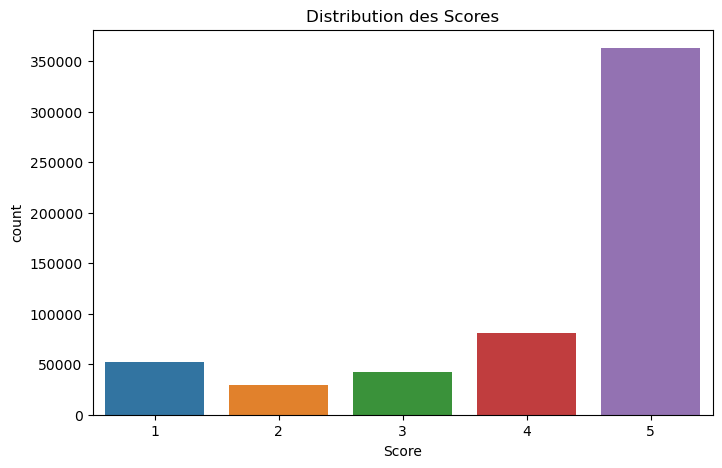

In [12]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Score', data=data)
plt.title('Distribution des Scores')
plt.show()

### Expliquons les résultats :

- **Score 5 :** Il y a 363,122 occurrences où le score est égal à 5.
  
- **Score 4 :** Il y a 80,655 occurrences où le score est égal à 4.

- **Score 1 :** Il y a 52,268 occurrences où le score est égal à 1.

- **Score 3 :** Il y a 42,640 occurrences où le score est égal à 3.

- **Score 2 :** Il y a 29,769 occurrences où le score est égal à 2.

Ces résultats donnent une vue détaillée de la distribution des scores dans votre ensemble de données. Par exemple, le score 5 est largement plus fréquent que les autres scores, suggérant que la majorité des évaluations sont positives. À l'inverse, les scores 1, 2 et 3 sont moins fréquents, indiquant une proportion plus faible d'évaluations négatives ou neutres. Cette information peut être utile pour comprendre la tendance générale des évaluations dans votre ensemble de données.

# 3- Prétraitement des données :

## 3-1 Gérer les valeurs manquantes

In [14]:
data['Summary'] = data['Summary'].fillna('')

## 3-2 Traitement du texte

le code suivant réalise les actions suivantes :

1. Gère les valeurs manquantes en remplaçant par des chaînes vides.
2. Applique un processus de prétraitement au texte dans les colonnes 'Summary' et 'Text', supprimant la ponctuation, mettant en minuscules et supprimant les stopwords.

In [15]:
#Travailler sur les 1000 lignes
data = data.head(1000)

In [16]:
def preprocess_text(text):
    # Supprimer la ponctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Convertir en minuscules
    text = text.lower()
    # Supprimer les stopwords
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

# Appliquer le prétraitement aux colonnes 'Summary' et 'Text' en utilisant .loc[]
data.loc[:, 'Summary'] = data['Summary'].apply(preprocess_text)
data.loc[:, 'Text'] = data['Text'].apply(preprocess_text)

# Afficher les premières lignes après le prétraitement
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,good quality dog food,bought several vitality canned dog food produc...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,advertised,product arrived labeled jumbo salted peanutsth...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,delight says,confection around centuries light pillowy citr...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,cough medicine,looking secret ingredient robitussin believe f...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,great taffy,great taffy great price wide assortment yummy ...


# 4- Analyse Exploratoire des Données (EDA)

# 5- Utilisation de modèle pré-entraîné Roberta
## 5-1 Initialisation du Modèle RoBERTa pour l'Analyse de Sentiments

In [18]:
# Définition du modèle pré-entraîné à utiliser (dans ce cas, le modèle de sentiment basé sur RoBERTa pour Twitter)
MODEL = "cardiffnlp/twitter-roberta-base-sentiment"

# Initialisation du tokenizer avec le modèle pré-entraîné
tokenizer = AutoTokenizer.from_pretrained(MODEL)

# Initialisation du modèle de classification de séquence basé sur RoBERTa pour Twitter
model = AutoModelForSequenceClassification.from_pretrained(MODEL)


## 5-2 Fonction d'Évaluation des Scores de RoBERTa pour l'Analyse de Sentiments
Cette fonction, nommée "roberta_scores", prend en entrée un exemple de texte, l'encode à l'aide du tokenizer associé au modèle RoBERTa pré-entraîné pour l'analyse de sentiments sur Twitter, puis utilise le modèle pour obtenir des scores de sentiment. Les scores sont ensuite normalisés avec la fonction softmax et renvoyés sous forme de dictionnaire comprenant les probabilités associées aux classes négative, neutre et positive.

In [19]:
def roberta_scores(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'rta_neg' : scores[0],
        'rta_neu' : scores[1],
        'rta_pos' : scores[2]
    }
    return scores_dict

## 5-3 Analyse de Sentiments avec RoBERTa sur l'Ensemble de Données
Ce code parcourt chaque ligne de l'ensemble de données 'data', récupère le texte et l'identifiant associé, puis utilise la fonction 'roberta_scores' pour effectuer une analyse de sentiment avec le modèle RoBERTa pré-entraîné. Les résultats de RoBERTa sont ensuite stockés dans un dictionnaire 'res', associant chaque identifiant à ses scores de sentiment correspondants. En cas d'erreur de type RuntimeError, un message est affiché indiquant l'échec de l'analyse pour un identifiant spécifique.

In [25]:
res = {}
for i, row in tqdm(data.iterrows(), total=len(data)):
    try:
        text = row['Text']
        myid = row['Id']

        # Perform sentiment analysis with Roberta
        roberta_result = roberta_scores(text)

        # Keep only Roberta results
        res[myid] = roberta_result
    except RuntimeError:
        print(f'Broke for id {myid}')


  0%|          | 0/500 [00:00<?, ?it/s]

In [31]:
# Affichage du dictionnaire résultant de l'analyse de sentiment avec RoBERTa
res

{1: {'rta_neg': 0.007874446, 'rta_neu': 0.08880092, 'rta_pos': 0.90332466},
 2: {'rta_neg': 0.08493852, 'rta_neu': 0.8423908, 'rta_pos': 0.07267068},
 3: {'rta_neg': 0.0046725716, 'rta_neu': 0.13230933, 'rta_pos': 0.86301816},
 4: {'rta_neg': 0.0055126064, 'rta_neu': 0.34244046, 'rta_pos': 0.65204686},
 5: {'rta_neg': 0.001966447, 'rta_neu': 0.012693261, 'rta_pos': 0.9853403},
 6: {'rta_neg': 0.0023043938, 'rta_neu': 0.048075844, 'rta_pos': 0.9496198},
 7: {'rta_neg': 0.0020632278, 'rta_neu': 0.012395268, 'rta_pos': 0.9855415},
 8: {'rta_neg': 0.0017318623, 'rta_neu': 0.014302323, 'rta_pos': 0.9839659},
 9: {'rta_neg': 0.0155409295, 'rta_neu': 0.67226887, 'rta_pos': 0.31219015},
 10: {'rta_neg': 0.008339728, 'rta_neu': 0.20592855, 'rta_pos': 0.7857317},
 11: {'rta_neg': 0.054626763, 'rta_neu': 0.17712384, 'rta_pos': 0.7682494},
 12: {'rta_neg': 0.27985084, 'rta_neu': 0.65204746, 'rta_pos': 0.06810173},
 13: {'rta_neg': 0.12532794, 'rta_neu': 0.570371, 'rta_pos': 0.30430102},
 14: {'rta

## 5-4 Transformation et Fusion des Résultats d'Analyse de Sentiments avec les Données d'Origine

In [32]:
df = pd.DataFrame(res).T
df = df.reset_index().rename(columns={'index': 'Id'})
df = df.merge(data, how='left')
df

,Id,rta_neg,rta_neu,rta_pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.007874,0.088801,0.903325,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,good quality dog food,bought several vitality canned dog food produc...
1,2,0.084939,0.842391,0.072671,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,advertised,product arrived labeled jumbo salted peanutsth...
2,3,0.004673,0.132309,0.863018,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,delight says,confection around centuries light pillowy citr...
3,4,0.005513,0.342440,0.652047,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,cough medicine,looking secret ingredient robitussin believe f...
4,5,0.001966,0.012693,0.985340,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,great taffy,great taffy great price wide assortment yummy ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,0.002208,0.012334,0.985459,B000G6RYNE,APGAA43E3WPN7,Darren,0,0,5,1201392000,amazing chips,rarely eat chips saw tried really amazing love...
496,497,0.038174,0.192785,0.769041,B000G6RYNE,ABR7HU5H1KNE,Keith,0,0,5,1196726400,best chip ever,easily best potato chip ever look ingredients ...
497,498,0.012353,0.092927,0.894720,B000G6RYNE,AJQD2WWJYOYFQ,bubbles,0,0,4,1186617600,tangy spicy sweet oh,kettle chips spicy thai potato chips perfect a...
498,499,0.060589,0.572106,0.367306,B000G6RYNE,A16YH487W9ZYO0,Bruce G. Lindsay,0,0,4,1184198400,indulgence bite,okay eat potato chips anyonebr spicy would fin...


In [33]:
df.columns 

Index(['Id', 'rta_neg', 'rta_neu', 'rta_pos', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

# 6 Visualisations
## Distribution des Scores Roberta
Ces trois graphiques représentent la distribution des scores de sentiment pour chaque colonne. Les histogrammes sont un moyen simple de visualiser la distribution des données, en montrant la fréquence de chaque valeur. Dans ce cas, les histogrammes montrent que les scores rta_neg sont les plus fréquents, suivis des scores rta_neu, puis des scores rta_pos.

### Visualisation de la Distribution des Scores Negatives

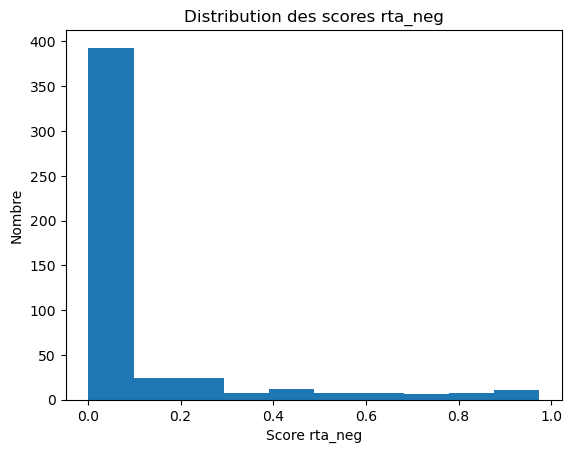

In [38]:
plt.hist(df['rta_neg'])
plt.title('Distribution des scores rta_neg')
plt.xlabel('Score rta_neg')
plt.ylabel('Nombre')
plt.show()

### la distribution des scores Neutres ROBERTA

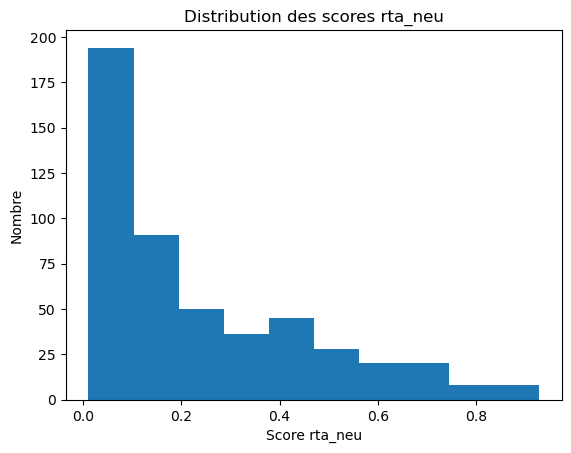

In [39]:
plt.hist(df['rta_neu'])
plt.title('Distribution des scores rta_neu')
plt.xlabel('Score rta_neu')
plt.ylabel('Nombre')
plt.show()

###  La distribution des scores positives ROBERTA

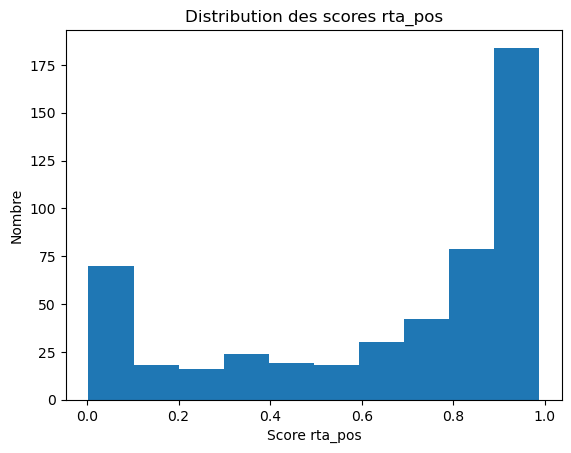

In [40]:
plt.hist(df['rta_pos'])
plt.title('Distribution des scores rta_pos')
plt.xlabel('Score rta_pos')
plt.ylabel('Nombre')
plt.show()